# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [89]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [20]:
df.head(5)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

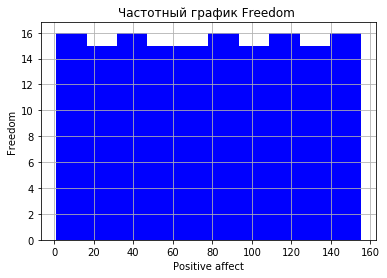

In [8]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='b')

plt.xlabel('Positive affect')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom ')
plt.grid(True)
plt.show()

На графике видно, что это равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [22]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  71.0


In [21]:
# 
freedom_counts = {}
for p in df['Freedom']:
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1
#print(freedom_counts)

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxfr = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxfr < v:
        maxfr = v
        mode_freedom = k
print('Значение моды: ', mode_freedom, 'Количество встречаемости: ', maxfr)

Значение моды:  5.0 Количество встречаемости:  1


In [12]:
statistics.mode(df['Freedom'])

StatisticsError: no unique mode; found 156 equally common values

Поскольку значения в столбце Freedom это ранжирование стран по показателю "Свобода", а не абсолютные значения, то все эти значения уникальные и моду определить нельзя. В связи с чем метод statistic.mode() и выдает ошибку

Прежде чем приступать к поиску остальных величин, подчистим таблицу, удалив строки с пустым значением в столбце Freedom. Такая строка в таблице только одна

In [105]:
df=df[df['Country (region)']!='Qatar']

In [106]:
""" Математическое ожидание """
statistics.mean(df['Freedom'])

78.0

In [107]:
"""Стандартное отклонение"""
statistics.pstdev(df['Freedom'])

44.74371464239419

In [108]:
"""Дисперсия"""
statistics.pvariance(df['Freedom'])

2002.0

In [109]:
"""Минимум и максимум """
min(df['Freedom'])

1.0

In [110]:
max(df['Freedom'])

155.0

In [112]:
"""Размах"""
max(df['Freedom'])-min(df['Freedom'])

154.0

Выбросов в колонке Freedom нет
В целом все эти параметры не имеют смысла, так как, как и было сказано выше, значения в столбце Freedom очень похожи на ранжирование, а не абсолютные показатели свободы в странах

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

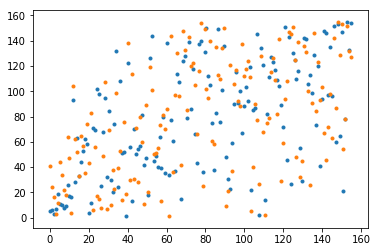

In [114]:
len_column = len(df['Freedom']) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
plt.scatter(x, df['Freedom'], marker='.')
plt.scatter(x, df['Positive affect'], marker='.')

Коэффициент корреляции Пирсона: 0.6817698430601656


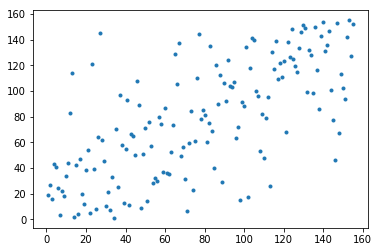

In [115]:
from scipy.stats import pearsonr
x = df.Freedom
y = df['Positive affect']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент Пирсона получаем с положительным знаком и значением ближе к единице, чем к нулю, что говорит о близости измеряемых массивов к прямой зависимости

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [62]:
Freedom = df['Freedom']
print(statistics.mean(Freedom))

78.0


In [63]:
freedom = Freedom - statistics.mean(Freedom)
print(statistics.mean(freedom))

0.0


In [64]:
min(freedom)

-77.0

In [65]:
max(freedom)

77.0

In [66]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom2 = min_max_scaler.fit_transform(np.array(freedom).reshape(-1, 1))
print(min(freedom2))
print(max(freedom2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

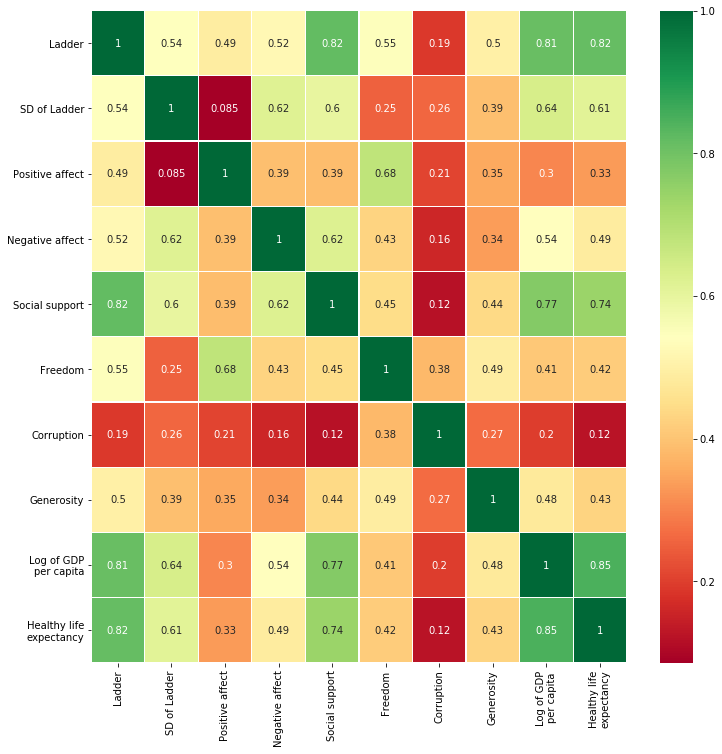

In [69]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [84]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df2=pd.read_csv(url)
df2[100:103]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
100,48,2015-01-25,1.10,449332.85,393408.17,18718.27,594.25,36612.16,13176.39,23435.77,0.0,conventional,2015,Atlanta
101,49,2015-01-18,1.11,431490.99,372236.92,18701.90,511.69,40040.48,16782.71,23257.77,0.0,conventional,2015,Atlanta
102,50,2015-01-11,1.11,397542.72,330411.24,18958.22,1135.18,47038.08,21309.61,25728.47,0.0,conventional,2015,Atlanta


Сделать частотный график колонки AveragePrice. Какое это распределение?

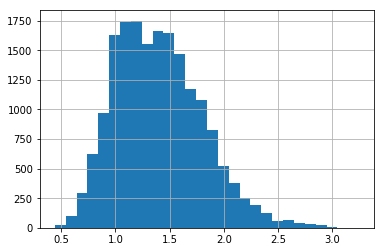

In [83]:
ax=df2.AveragePrice.hist(bins=28)

Это нормальное распределение. По "хвосту" в правой части есть гипотеза о сравнительно небольшим количестве премиум-супермаркетов, которые предлагают товар по ценам значительно выше среднего

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [119]:
df2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


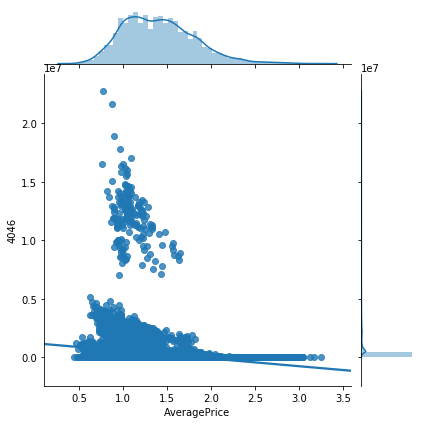

In [124]:
ax2=sns.jointplot(x='AveragePrice', y='4046', 
              data=df2, kind='reg')

In [131]:
x = df2['4046']
y = df2['AveragePrice']

corr, p_value = pearsonr(x, y)
corr

-0.20831704848788477

На первый взгляд корреляция очень невысока, это подтверждает и коэффициент Пирсона. Но если обратить внимание на график, то видно, что есть две отдельные группы значений. Та, что в верхней части графика, похоже, относится к большим поставкам/продажам(>6000000) и цены там ниже среднего.
Вторая группа - это размеры поставок меньше 5000000 
Попробуем рассмотреть эти группы отдельно

In [128]:
df2_1=df2[df2['4046']>6000000]

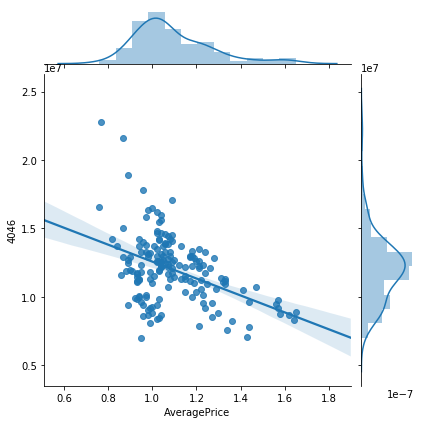

In [129]:
ax3=sns.jointplot(x='AveragePrice', y='4046', 
              data=df2_1, kind='reg')

In [130]:
x = df2_1['4046']
y = df2_1['AveragePrice']

corr, p_value = pearsonr(x, y)
corr

-0.4364029900371939

Для первой группы уже немного прослеживается обратная зависимость. Если поработать с выбросами в верхней части графика, то можно повысить абсолютное значение коэффициента Пирсона до значения более 0,5

Теперь рассмотрим вторую группу

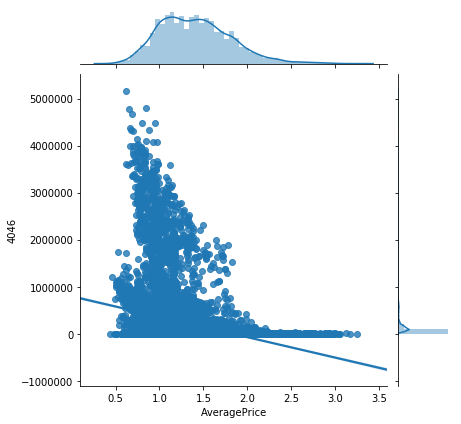

In [136]:
df2_2=df2[df2['4046']<6000000]
ax4=sns.jointplot(x='AveragePrice', y='4046', 
              data=df2_2, kind='reg')

In [137]:
x = df2_2['4046']
y = df2_2['AveragePrice']

corr, p_value = pearsonr(x, y)
corr

-0.3418591854317798

Здесь также обратная зависимость, но уже не такая сильная, как в первой группе. Картину портят поставки размером меньше 200000, там очень большой разброс цен.